<a href="https://colab.research.google.com/github/nehagupta4424/leaf-disease-detection/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q  kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nehagupta2244","key":"916e59ae12a23a36e2010a88d30959b2"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                                title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                           Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23          14600        419  1.0              
ruchi798/data-science-job-salaries                                 Data Science Job Salaries                             7KB  2022-06-15 08:59:12           2984         98  1.0              
zusmani/petrolgas-prices-worldwide                                 Petrol/Gas Prices Worldwide                          10KB  2022-06-24 01:25:33           1691         85  1.0              
imoore/age-dataset                           

In [7]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:11<00:00, 201MB/s]
100% 2.70G/2.70G [00:11<00:00, 242MB/s]


In [8]:
! unzip new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2


In [10]:
#building image data generator
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


In [11]:
#EDA
len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [12]:

#have to remove rescale in both as we have added preprocessing inpurt..
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,rescale=1/255,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(preprocessing_function= preprocess_input)


In [13]:

# inside "" -> train location and val location
train=train_datagen.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",target_size=(256,256),batch_size=32)
val=val_datagen.flow_from_directory("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",target_size=(256,256),batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


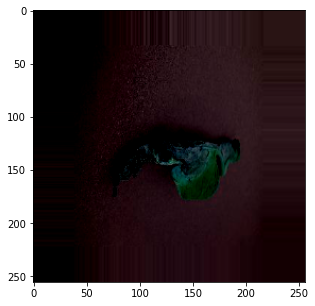

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


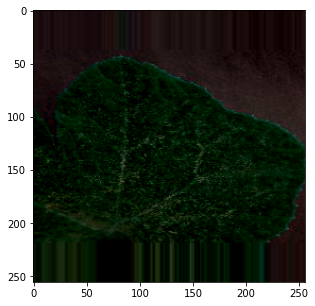

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


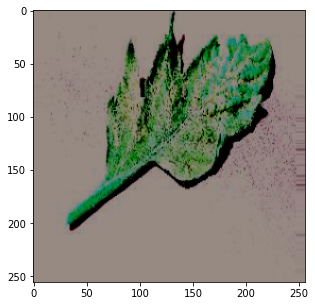

In [14]:
# test image 
t_img,lable=train.next()
#have taken only 32 img if its more ram error
t_img.shape
# so we will def a func

def plotImage(img_arr,lable):
  for im , l in zip(img_arr,lable):
    plt.figure(figsize=(5,5))
    plt.imshow(im) #in (im/255) it will  change the color
    plt.show()
#without [] it will give all image  inside [] we are printing only 3 img
plotImage(t_img[:3],lable[:3])

end of preprocessing images and validation data



BUILDING OUR MODEL

In [15]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [16]:
base_model = VGG19(input_shape=(256,256,3),include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [17]:
for layer in base_model.layers:
  layer.trainable=False


In [18]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:
from keras.layers.core.activation import Activation
x=Flatten()(base_model.output)
x=Dense(units=38, activation='softmax')(x)


#creating model
model = Model(base_model.input,x)



In [20]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [21]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy , metrics=['accuracy'])



 EARLY STOPPING AND MODEL CHECK POINT

In [22]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#early stopping
es=EarlyStopping(monitor= 'val_accuracy', min_delta=0.01,patience= 3,verbose=1)

#model check point
mc=ModelCheckpoint(filepath="best_model.h5",
                             monitor='val_accuracy',
                             min_delta=0.01,
                            patience= 3,
                            verbose=1, 
                     save_best_only=True)
cb = [es,mc]

In [23]:
his = model.fit(train , steps_per_epoch=16,
                          epochs= 50, 
                          verbose= 1,
                          callbacks= cb, 
                          validation_data= val, 
                          validation_steps= 16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 6.3994 - accuracy: 0.0898
Epoch 1: val_accuracy improved from -inf to 0.14062, saving model to best_model.h5
16/16 [==============================] - 27s 812ms/step - loss: 6.3994 - accuracy: 0.0898 - val_loss: 39.2712 - val_accuracy: 0.1406
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 3.6222 - accuracy: 0.2793
Epoch 2: val_accuracy improved from 0.14062 to 0.32422, saving model to best_model.h5
16/16 [==============================] - 13s 795ms/step - loss: 3.6222 - accuracy: 0.2793 - val_loss: 26.8517 - val_accuracy: 0.3242
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 2.2806 - accuracy: 0.4160
Epoch 3: val_accuracy improved from 0.32422 to 0.33984, saving model to best_model.h5
16/16 [==============================] - 13s 797ms/step - loss: 2.2806 - accuracy: 0.4160 - val_loss: 28.2677 - val_accuracy: 0.3398
Epoch 4/50
16/16 [==============================] - ETA: 0s - lo

In [24]:
h=his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

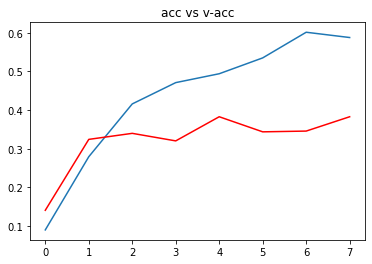

In [25]:

#plotting the graph
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

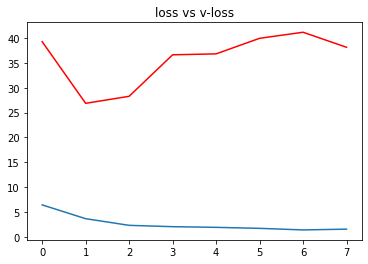

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c= "red")
plt.title("loss vs v-loss")
plt.show()

In [27]:
#load best model
from keras.models import load_model
model=load_model("/content/best_model.h5")

In [29]:

acc=model.evaluate(val)[1]
print(f"the accuracy of your model is {acc*100} %")

550/550 [==============================] - 125s 226ms/step - loss: 37.4384 - accuracy: 0.3534
the accuracy of your model is 35.340315103530884 %


In [30]:

ref = dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))


In [31]:
def prediction(path):
  img = load_img(path, target_size=(256,256))
  i = img_to_array(img)

  im = preprocess_input(i)

  img = np.expand_dims(im , axis= 0)


  print(img.shape)

  pred = np.argmax(model.predict(img))
  print(pred)

  print(f"the image belongs to{ref[pred]}")
  

In [ ]:
#pred = model.predict(img)
#print(pred)
#pred = np.argmax(model.predict(img) )
#print(f" the image belongs to {ref[pred] } ")

(1, 256, 256, 3)
29
the image belongs toTomato___Early_blight


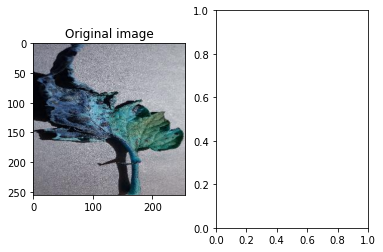

In [53]:
img=cv2.imread("/content/test/test/TomatoEarlyBlight1.JPG")
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(img)  # BGR to RGB
ax[0].set_title('Original image')

path="/content/test/test/TomatoEarlyBlight1.JPG"
prediction(path)


In [36]:
#output of above will be index value to check the what is at thta index we will use this command
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma